In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

# How tall do oak trees grow?

Let's say we're about to get some data on oak tree heights and we want to infer the average height, $\mu,$ of oak trees. We're not really sure what the average height of oak trees is, but let's guess the average height is at least 10 meters, maybe more, but certainly not more than 50 meters. So, taller than a 3-story building but shorter than a 15-story building.

## Prior distribution

To represent this guess, I'm going to make up a prior distribution that looks like this:

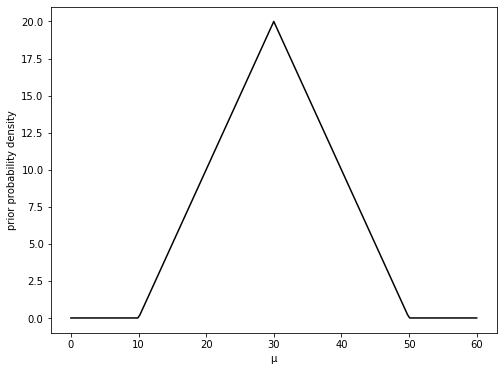

In [2]:
# mu is the average height, which we don't know and want to infer from data.
# We create an array of possible values between 0 and 60.
mu = np.linspace(0, 60, 201)

# The prior is greater than 0 in the range (0, 50) based on our guess.
prior = np.where(
    mu > 10,
    np.where(
        mu < 30, mu - 10,
        np.where(
            mu < 50, 50 - mu, 0)),
    0)

plt.figure(figsize=(8, 6))
plt.plot(mu, prior, color='black')
plt.xlabel('μ')
plt.ylabel('prior probability density')
plt.show()

This is a pretty unusual prior distribution, but we're working with unusual distributions in this example to make the point that you can, in principle, use anything and not just the standard distributions that get used all the time.

There is a problem with this prior, though – it doesn't integrate to 1 and is therefore not normalized. This means it's not a valid probability distribution.

Let's compute the area under the curve numerically using the trapezoidal rule and divide by the result to normalize the distribution. (If you've forgotten what the trapezoid rule is, [here is a refresher video](https://www.khanacademy.org/math/ap-calculus-ab/ab-integration-new/ab-6-2/v/trapezoidal-approximation-of-area-under-curve).)

Note that the resulting distribution has the same shape as before. All that changed is the scale on the vertical axis.

Area under the unnormalized prior curve: 400.02000000000004


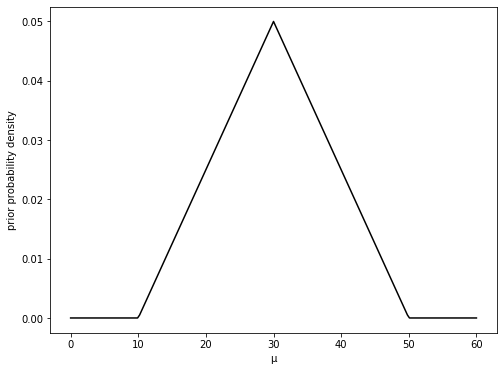

In [3]:
# Remember the unnormalized values
unnormalized_prior = prior

# Use the trapezoid rule to compute the integral of the unnormalized prior
area = sp.integrate.trapz(unnormalized_prior, mu)
print('Area under the unnormalized prior curve:', area)

# Normalize the prior
prior = unnormalized_prior / area

plt.figure(figsize=(8, 6))
plt.plot(mu, prior, color='black')
plt.xlabel('μ')
plt.ylabel('prior probability density')
plt.show()

## Likelihood function

For the likelihood, we need something with positive support. Let's pick a truncated normal distribution. It's truncated on the left since we can't have tree heights less than 0.

In SciPy, the truncated normal distribution is available using the `truncnorm()` function.

For this example, we'll assume the standard deviation of the truncated normal is known and equals 2 meters. (In practice, we'll usually not know this standard deviation and we'll want to infer both $\mu$ and $\sigma$ from data. You will see this in a future lesson.)

Let's say we measure 1 tree and its height is 20 meters. What does this tell us about $\mu$? Qualitatively, we can see that this tree is much taller than the 10 m lower limit of the prior range.

What is the likelihood function for this datum? Remember that the likelihood is a function of the variable $\mu.$ Let's plot it.

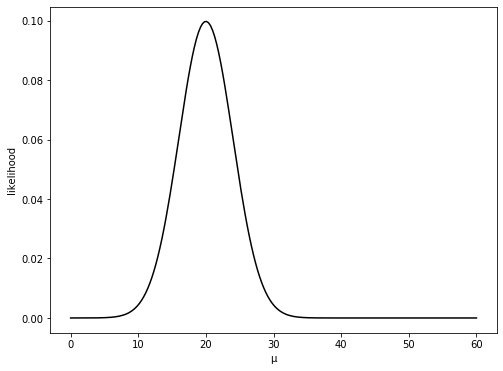

In [4]:
# We measured a tree of height 20 m
datum = 20

# Parameters of the truncated normal pdf
sigma = 4
lower_limit = 0
upper_limit = np.inf
likelihood = sts.truncnorm.pdf(
    datum,
    (lower_limit-mu)/sigma,  # See the SciPy documentation. The lower and upper
    (upper_limit-mu)/sigma,  # limits are defined in terms of the standard normal.
    loc=mu,
    scale=sigma)
    
plt.figure(figsize=(8, 6))
plt.plot(mu, likelihood, color='black')
plt.xlabel('μ')
plt.ylabel('likelihood')
plt.show()

Note that the likelihood function favors our measured value of 20 m but allows some uncertainty around it.

We don't normalize the likelihood function since it is not a probability distribution over $\mu.$

## Posterior

Compute the posterior as the normalized product of the likelihood and the prior.

Normalization constant of posterior: 0.02497933098148362


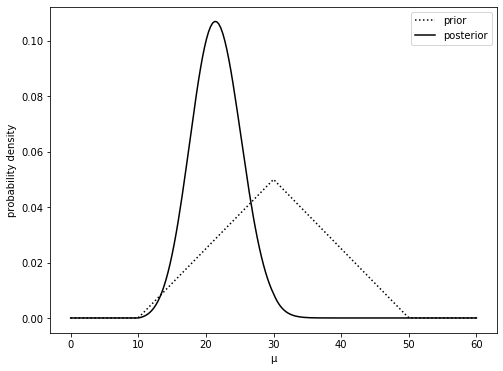

In [5]:
unnormalized_posterior = prior * likelihood

area = sp.integrate.trapz(unnormalized_posterior, mu)
print('Normalization constant of posterior:', area)

posterior = unnormalized_posterior / area

plt.figure(figsize=(8, 6))
plt.plot(mu, prior, color='black', linestyle=':', label='prior')
plt.plot(mu, posterior, color='black', label='posterior')
plt.xlabel('μ')
plt.ylabel('probability density')
plt.legend()
plt.show()

The posterior is clearly very different from the prior, so even this one measurement has had a large impact on our belief about the average height of oak trees.

It's actually a bit difficult to see that the posterior is different from the likelihood. Let's add the likelihood to the plot.

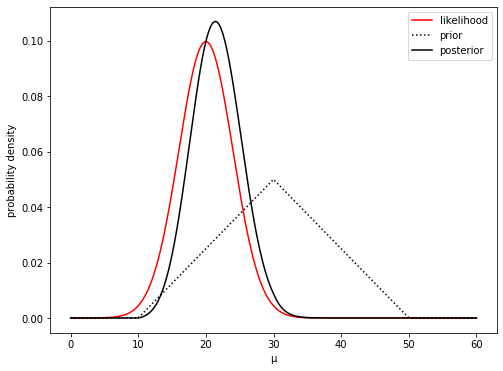

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(mu, likelihood, color='red', label='likelihood')
plt.plot(mu, prior, color='black', linestyle=':', label='prior')
plt.plot(mu, posterior, color='black', label='posterior')
plt.xlabel('μ')
plt.ylabel('probability density')
plt.legend()
plt.show()

Here, we can see the posterior is between the prior and the likelihood but definitely closer to the likelihood.

## Tasks

Now, repeat the process above but after having measured 5 trees.

**Hint:** The posterior is the product of the prior (once) and the likelihood function of _each_ of the 5 data. This means you need to multiply 6 arrays to get the posterior.

The measured tree heights are (20, 27, 23.5, 28.2, 21).

Plot the prior, the likelihood, and the posterior. Remember that all 3 of these functions are all defined over the parameter of interest, namely $\mu,$ the average tree height.

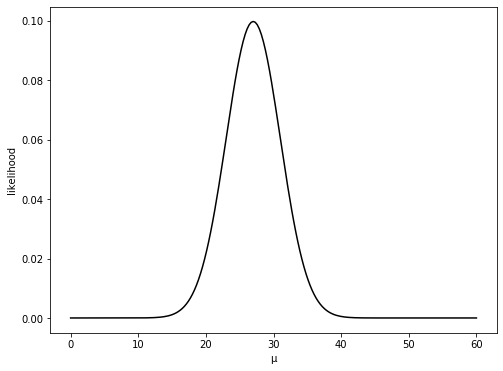

In [7]:
data = [20, 27, 23.5, 28.2, 21]

#the likelihood function equals p(x=data[i]|theta)

likelihood1 = sts.truncnorm.pdf(
    data[1],
    (lower_limit-mu)/sigma,  # See the SciPy documentation. The lower and upper
    (upper_limit-mu)/sigma,  # limits are defined in terms of the standard normal.
    loc=mu,
    scale=sigma)

plt.figure(figsize=(8, 6))
plt.plot(mu, likelihood1, color='black')
plt.xlabel('μ')
plt.ylabel('likelihood')
plt.show()

Normalization constant of posterior: 0.04424194281125992


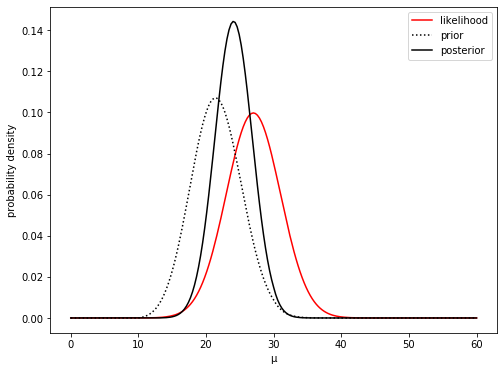

In [8]:
prior = posterior

unnormalized_posterior = prior * likelihood1
area = sp.integrate.trapz(unnormalized_posterior, mu)
print('Normalization constant of posterior:', area)
posterior = unnormalized_posterior / area

plt.figure(figsize=(8, 6))
plt.plot(mu, likelihood1, color='red', label='likelihood')
plt.plot(mu, prior, color='black', linestyle=':', label='prior')
plt.plot(mu, posterior, color='black', label='posterior')
plt.xlabel('μ')
plt.ylabel('probability density')
plt.legend()
plt.show()

Normalization constant of posterior: 0.08153872194945215


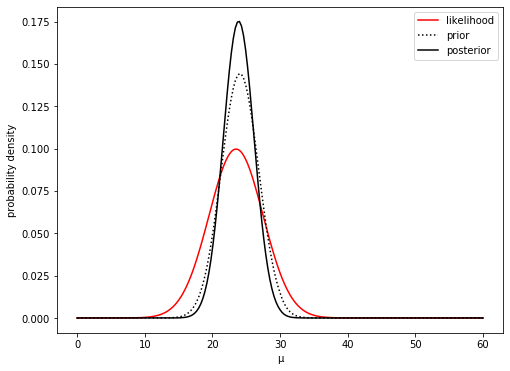

In [9]:
likelihood2 = sts.truncnorm.pdf(
    data[2],
    (lower_limit-mu)/sigma,  # See the SciPy documentation. The lower and upper
    (upper_limit-mu)/sigma,  # limits are defined in terms of the standard normal.
    loc=mu,
    scale=sigma)

prior = posterior

unnormalized_posterior = prior * likelihood2
area = sp.integrate.trapz(unnormalized_posterior, mu)
print('Normalization constant of posterior:', area)
posterior = unnormalized_posterior / area

plt.figure(figsize=(8, 6))
plt.plot(mu, likelihood2, color='red', label='likelihood')
plt.plot(mu, prior, color='black', linestyle=':', label='prior')
plt.plot(mu, posterior, color='black', label='posterior')
plt.xlabel('μ')
plt.ylabel('probability density')
plt.legend()
plt.show()

Normalization constant of posterior: 0.05594259431880175


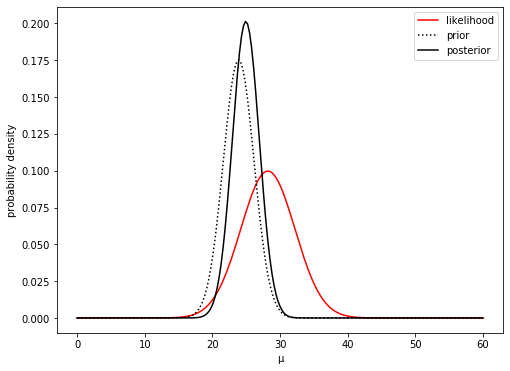

In [10]:
likelihood3 = sts.truncnorm.pdf(
    data[3],
    (lower_limit-mu)/sigma,  # See the SciPy documentation. The lower and upper
    (upper_limit-mu)/sigma,  # limits are defined in terms of the standard normal.
    loc=mu,
    scale=sigma)

prior = posterior

unnormalized_posterior = prior * likelihood3
area = sp.integrate.trapz(unnormalized_posterior, mu)
print('Normalization constant of posterior:', area)
posterior = unnormalized_posterior / area

plt.figure(figsize=(8, 6))
plt.plot(mu, likelihood3, color='red', label='likelihood')
plt.plot(mu, prior, color='black', linestyle=':', label='prior')
plt.plot(mu, posterior, color='black', label='posterior')
plt.xlabel('μ')
plt.ylabel('probability density')
plt.legend()
plt.show()

Normalization constant of posterior: 0.060474703259763035


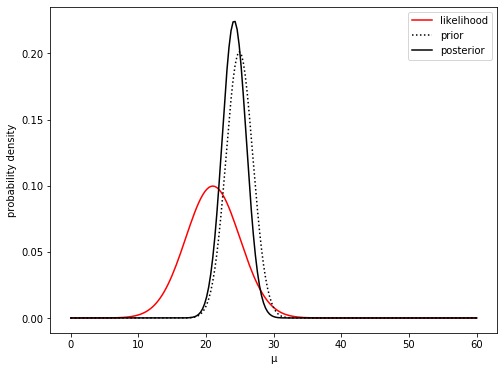

In [11]:
likelihood4 = sts.truncnorm.pdf(
    data[4],
    (lower_limit-mu)/sigma,  # See the SciPy documentation. The lower and upper
    (upper_limit-mu)/sigma,  # limits are defined in terms of the standard normal.
    loc=mu,
    scale=sigma)

prior = posterior

unnormalized_posterior = prior * likelihood4
area = sp.integrate.trapz(unnormalized_posterior, mu)
print('Normalization constant of posterior:', area)
posterior = unnormalized_posterior / area

plt.figure(figsize=(8, 6))
plt.plot(mu, likelihood4, color='red', label='likelihood')
plt.plot(mu, prior, color='black', linestyle=':', label='prior')
plt.plot(mu, posterior, color='black', label='posterior')
plt.xlabel('μ')
plt.ylabel('probability density')
plt.legend()
plt.show()